# `datetime`, and `matplotlib` intro

This lesson rounds out the introductory pandas work and introduces our basic plotting library `matplotlib`.  

**OBJECTIVES**

- Understand and use `datetime` objects in pandas DataFrames
- Use `matplotlib` to produce basic plots from data
- Understand when to use histograms, boxplots, line plots, and scatterplots with data


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## `datetime`

A special type of data for pandas are entities that can be considered as dates.  We can create a special datatype for these using `pd.to_datetime`, and access the functions of the `datetime` module as a result.

In [2]:
# read in the AAPL data
url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa23/main/data/AAPL.csv'

#read_csv


In [3]:
# convert to datetime


In [4]:
# extract the month


In [5]:
# extract the day


In [6]:
# set date to be index of data


In [7]:
# sort the index


In [8]:
# select 2019


In [9]:
# read back in using parse_dates = True and index_col = 0


In [10]:
from datetime import datetime

In [11]:
# what time is it?


In [12]:
# how much time has passed?


### More with timestamps

- Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

- Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.


In [13]:
# create a pd.Timedelta


In [14]:
# shift a date by 3 months


#### Problems

In [15]:
ufo_url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa23/main/data/ufo.csv'

1. Return to the ufo data and convert the Time column to a datetime object.

2. Set the Time column as the index column of the data.

3. Sort it

4. Create a new dataframe with ufo sightings since January 1, 1999

### Grouping with Dates

An operation similar to that of the `groupby` function can be used with dataframes whose index is a datetime object.  This is the `resample` function, and the groups are essentially a time period like week, month, year, etc. 

In [16]:
dow = sns.load_dataset('dowjones')

In [17]:
#check the info


In [18]:
#handle the index


In [19]:
#check that things changed


In [20]:
#average yearly price


In [21]:
#quarterly maximum price


## Introduction to `matplotlib`

Now, let us turn our attention to plotting data.  We begin with basic plots, and later explore some customization and additional plots.  For these exercises, we will use the stock price data and a dataset about antarctic penguins from the `seaborn` library.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
penguins = sns.load_dataset('penguins')

### Line Plots with Matplotlib

To begin, select the `bill_length_mm` column of the data.  

In [24]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
### bill length
bill_length = penguins['bill_length_mm']

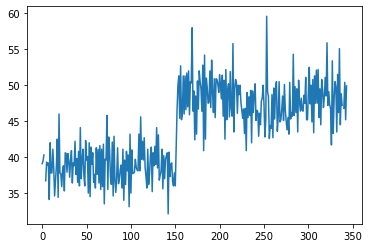

In [26]:
### plt.plot
plt.plot(bill_length)

<AxesSubplot: >

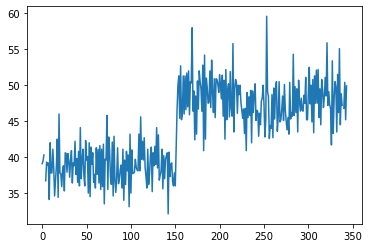

In [27]:
### use the series
bill_length.plot()

In [28]:
#plot dow jones Price with matplotlib


In [29]:
#plot dow jones data from series


#### Choosing A Plot

Below, plots are shown first for single quantiative variables, then single categorical variables.  Next, two continuous variables, one continuous vs. one categorical, and any mix of continuous and categorical.

#### Histogram

A histogram *is an approximate representation of the distribution of numerical data*.  This is a plot we use for any single continuous feature to better understand the shape of the data.  

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

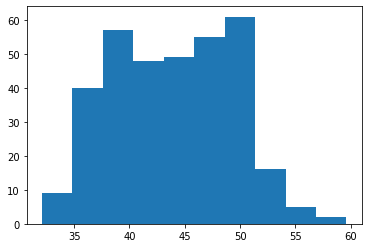

In [30]:
### bill length histogram
plt.hist(bill_length)

<AxesSubplot: >

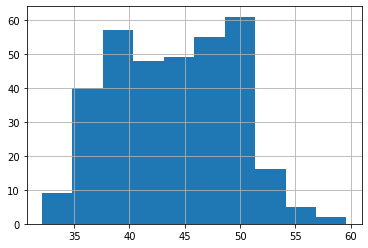

In [31]:
### as a method with the series
bill_length.hist()

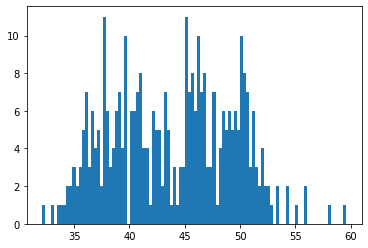

In [32]:
### adjusting the bin number
plt.hist(bill_length, bins = 100);

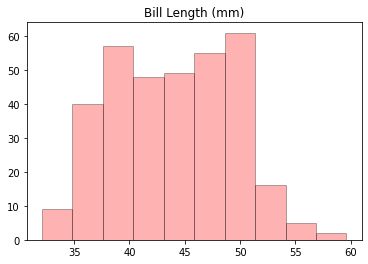

In [33]:
### adding a title, labels, edgecolor, and alpha
plt.hist(bill_length, 
         edgecolor = 'black', 
         color = 'red', 
         alpha = 0.3)
plt.title('Bill Length (mm)');

#### Boxplot

Similar to a histogram, a boxplot can be used on a single quantitative feature.

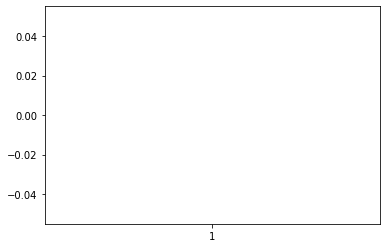

In [34]:
### boxplot of bill length
plt.boxplot(bill_length);

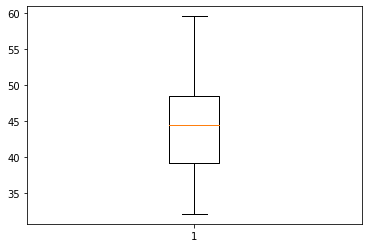

In [35]:
### WHOOPS -- lets try this without null values
plt.boxplot(bill_length.dropna());

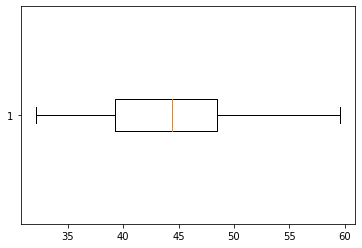

In [36]:
### Make a horizontal version of the plot
plt.boxplot(bill_length.dropna(), vert = False);

#### Bar Plot

A bar plot can be used to summarize a single categorical variable.  For example, if you want the counts of each unique category in a categorical feature. 

In [37]:
### counts of species
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot: >

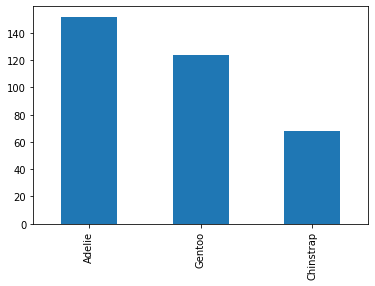

In [38]:
### barplot of counts
penguins['species'].value_counts().plot(kind = 'bar')

#### Two Variable Plots

In [39]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


#### Scatterplot

Two continuous features can be compared using scatterplots.  Typically, one is interested in if a relationship between the features exists and the strength and direction of many datasets.

In [40]:
### bill length vs. bill depth
x = bill_length
y = penguins['bill_depth_mm']

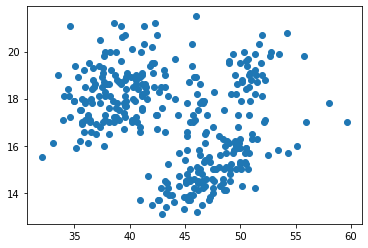

In [41]:
### scatterplot of x vs. y
plt.scatter(x, y)

#### `pandas.plotting`

There is not a quick easy plot in `matplotlib` to compare all numeric features in a dataset.  Instead, `pandas.plotting` has a `scatter_matrix` function that serves a similar purpose.

In [42]:
from pandas.plotting import scatter_matrix

In [43]:
### scatter matrix of penguin data


In [44]:
### adding arguments and changing size


**PROBLEMS**

In [45]:
iris = sns.load_dataset('iris')

In [46]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


**Problem 1**: Histogram of `petal_length`

**Problem 2**: Scatter plot of `sepal_length` vs. `sepal_width`.

**Problem 3**: New column where 

```
setosa -> blue
virginica -> green
versicolor -> orange
```

**Problem 4**: Scatterplot of `sepal_length` vs `petal_length` colored by species.

#### Subplots and Axes

![](https://matplotlib.org/stable/_images/users-explain-axes-index-1.2x.png)

In [47]:
### create a 1 row 2 column plot


In [48]:
### add a plot to each axis


In [49]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot


#### Summary

Great job!  We will get practice plotting in this weeks homework and examine some other libraries and approaches during class next week.  For now, make sure you are familiar with the basic plots above -- histogram, boxplot, bar plot, scatterplot -- and when to use each.  